# 5.2.4

Find the global minimum value of f = (x−1)<sup>4</sup>−x+(y−2)<sup>2</sup> using steepest decent and plot the progress of the algorithm. 
Use the initial point (1,1) and a step size of s = 0.1. Also track the (x,y) values during the execution of the algorithm, using a scatter plot. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def get_magnitude(x,y):
    return (x**2 + y**2)**0.5

def update_weights(x,y,xinc,yinc):
    x += xinc
    y += yinc
    return (x,y) 


In [27]:
def apply_steepest_decent(x,y,N,STEP,d):
    X = []
    Y = []

    for i in range(1,N+1):
        xinc, yinc = get_gradient(x,y,STEP)
        if get_magnitude(xinc,yinc) < d:
            break
        else:
            x,y = update_weights(x,y,xinc,yinc)
            X.append(x)
            Y.append(y)
    return X,Y, i


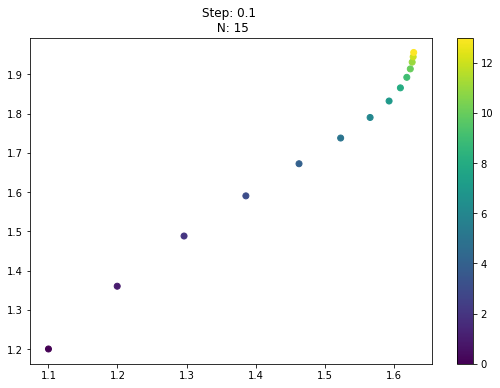

In [28]:
def get_gradient(x,y,STEP):
    xinc = 4*(x-1)**3 -1 
    yinc = 2*(y-2)
    return (-STEP*xinc, -STEP*yinc)

STEP = 0.1
N = 100
d=0.01
x0 = 1
y0 = 1
X, Y, N_break = apply_steepest_decent(x0,y0,N,STEP,d)
t = np.arange(len(Y))

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title(f"Step: {STEP} \n N: {N_break}")
sc = ax.scatter(X,Y, c=t)
color_bar = fig.colorbar(sc) 



# 5.2.5

Use the steepest decent algorithm to find the global minimum value of the function f (x,y) = x<sup>2</sup>(x − 2)(x + 3) + y<sup>2</sup>(y − 2)(y + 3), which is not convex. Play with the step size until you get smooth plots

(a) Use (1, 1) as the initial point. Plot f (x,y) against the number of iterations.


In [29]:
def get_gradient(x,y,STEP):
    xinc = 2*x*(x-2)*(x+3) + (x**2)*(x+3) + (x**2)*(x-2)
    yinc = 2*y*(y-2)*(y+3) + (y**2)*(y+3) + (y**2)*(y-2)
    return (-STEP*xinc, -STEP*yinc)


In [30]:
STEPS = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35]
N = 1000
d = 0.01


In [135]:
def execute_steep_desc_plot(N, d, x0,y0,STEPS):
    fig, axs = plt.subplots(5,2, figsize=(14, 20))

    for i, ax in enumerate(axs.reshape(-1)):
        try:
            X, Y, N_break = apply_steepest_decent(x0,y0,N,STEPS[i],d)
            t = np.arange(len(Y))
            ax.set_title(f"Step: {STEPS[i]} \n N: {N_break} \n x: {round(X[-1],2)} y: {round(Y[-1],2)} ")
            sc = ax.scatter(X,Y, c=t)
            cbar = fig.colorbar(sc, ax=ax) 
            cbar.set_label("Step Iteration", rotation=270,labelpad=10)
        except IndexError:
            ax.set_title(f"NO PLOT PRODUCED \n Step: {STEPS[i]}") 
        except OverflowError as err:
            print(f"Step size {STEPS[i]} causes ERROR: {err}")
            ax.set_title(f"NO PLOT PRODUCED \n Step: {STEPS[i]}") 
            pass
        fig.suptitle(f'Initalized x: {x0}  y: {y0}', size=16) 
        fig.tight_layout()
        fig.subplots_adjust(top=0.95)


Step size 0.25 causes ERROR: (34, 'Result too large')
Step size 0.3 causes ERROR: (34, 'Result too large')


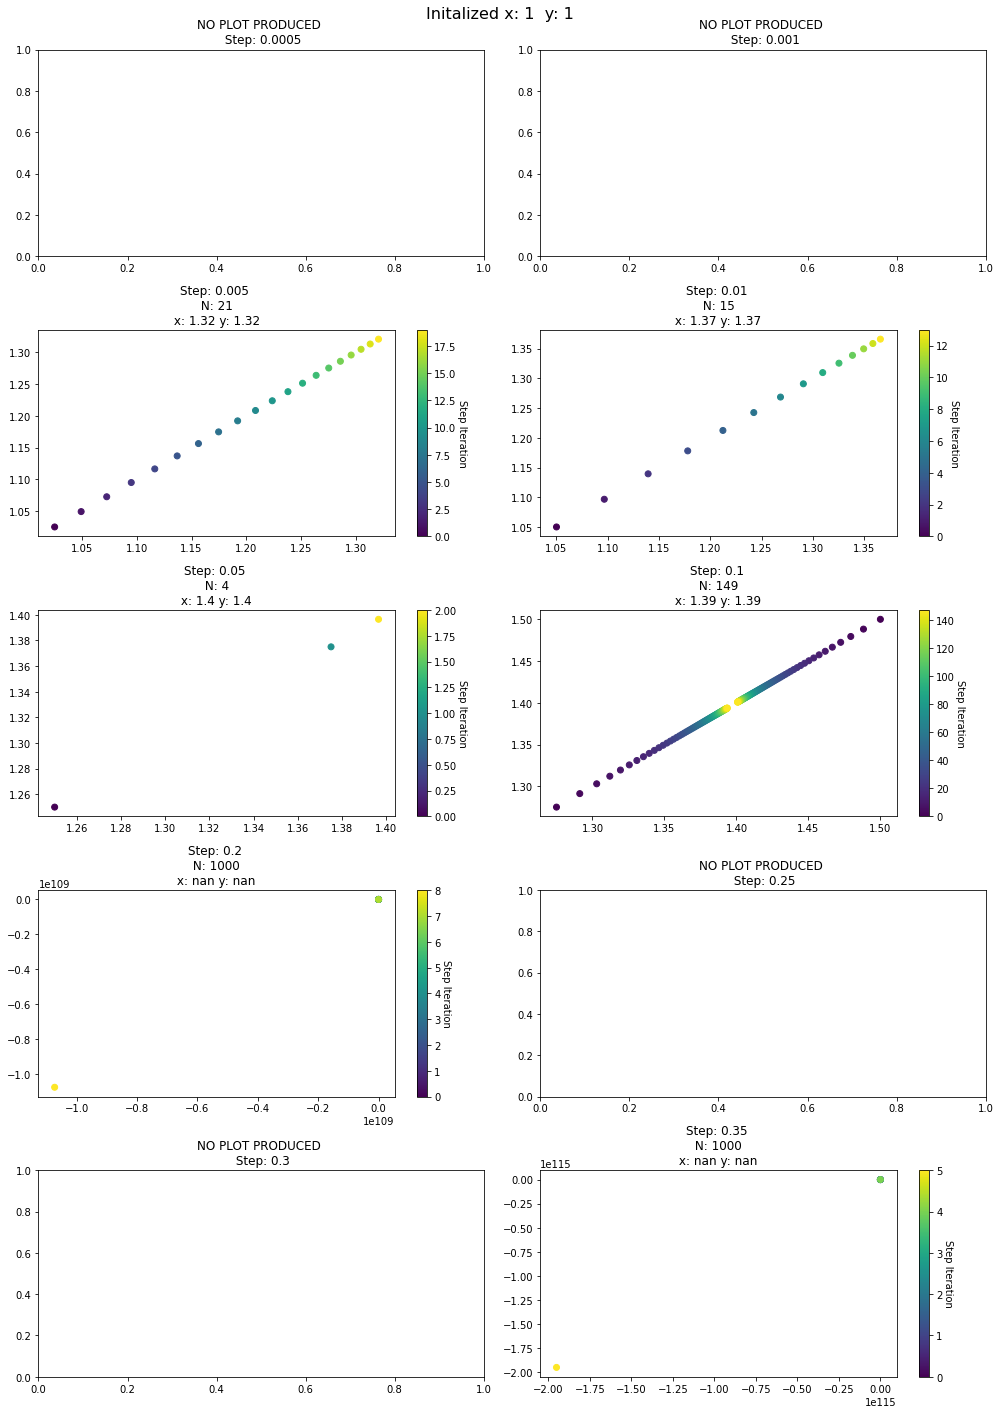

In [136]:
x0 = 1
y0 = 1
execute_steep_desc_plot(N, d, x0,y0,STEPS)


(b) Repeat with (1, -1) as the initial point

Step size 0.2 causes ERROR: (34, 'Result too large')
Step size 0.25 causes ERROR: (34, 'Result too large')
Step size 0.3 causes ERROR: (34, 'Result too large')
Step size 0.35 causes ERROR: (34, 'Result too large')


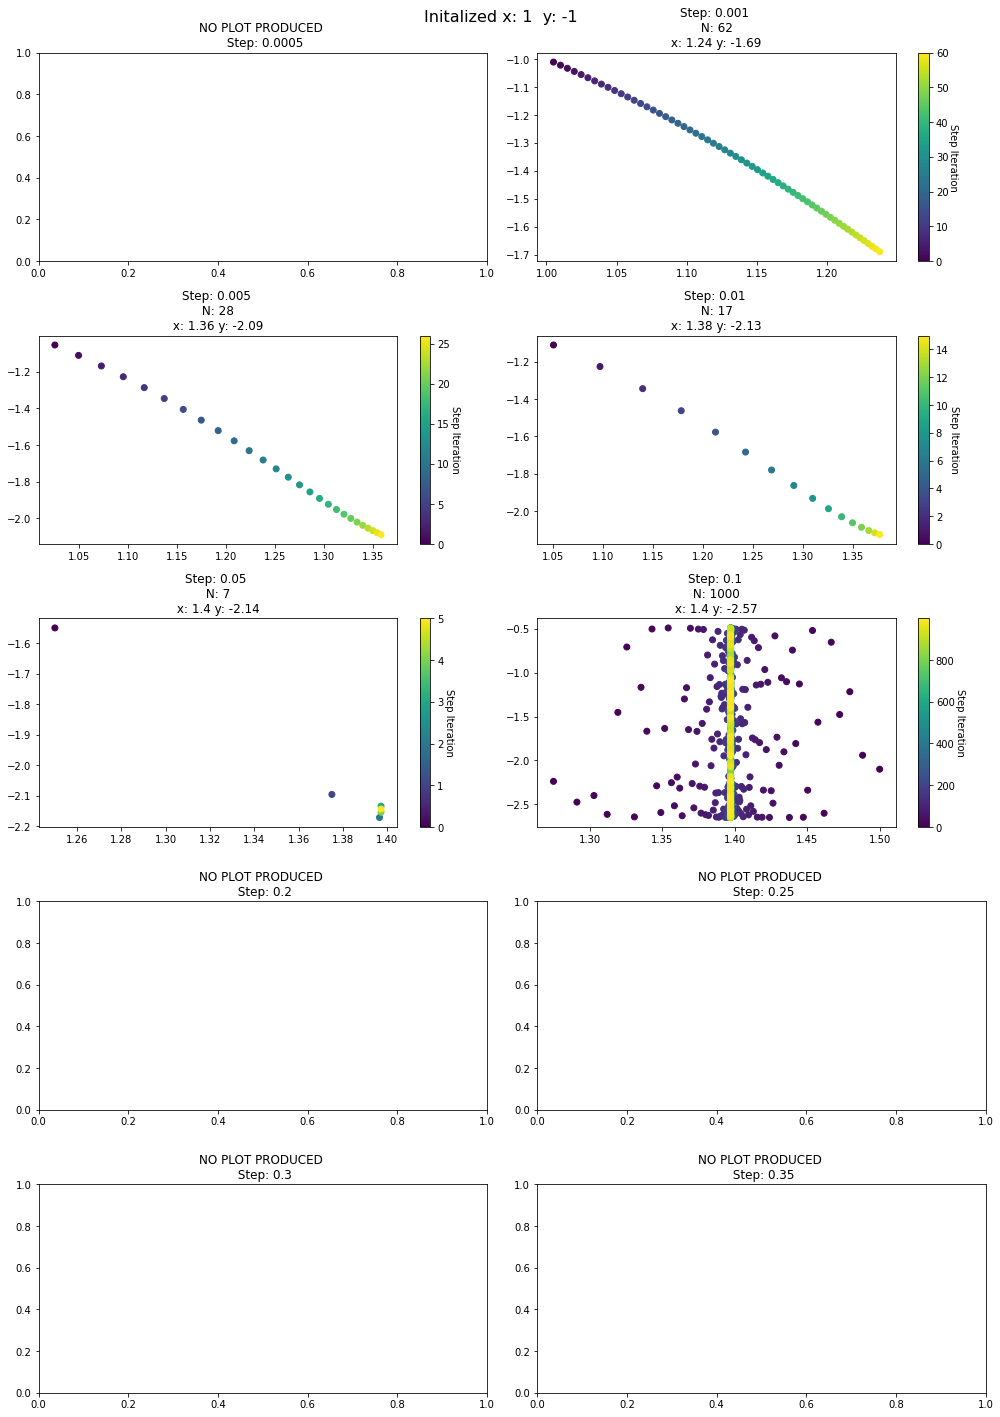

In [137]:
x0 = 1
y0 = -1

execute_steep_desc_plot(N, d, x0,y0,STEPS)

(c) Repeat with (-1, -1) as the initial point.


Step size 0.2 causes ERROR: (34, 'Result too large')
Step size 0.35 causes ERROR: (34, 'Result too large')


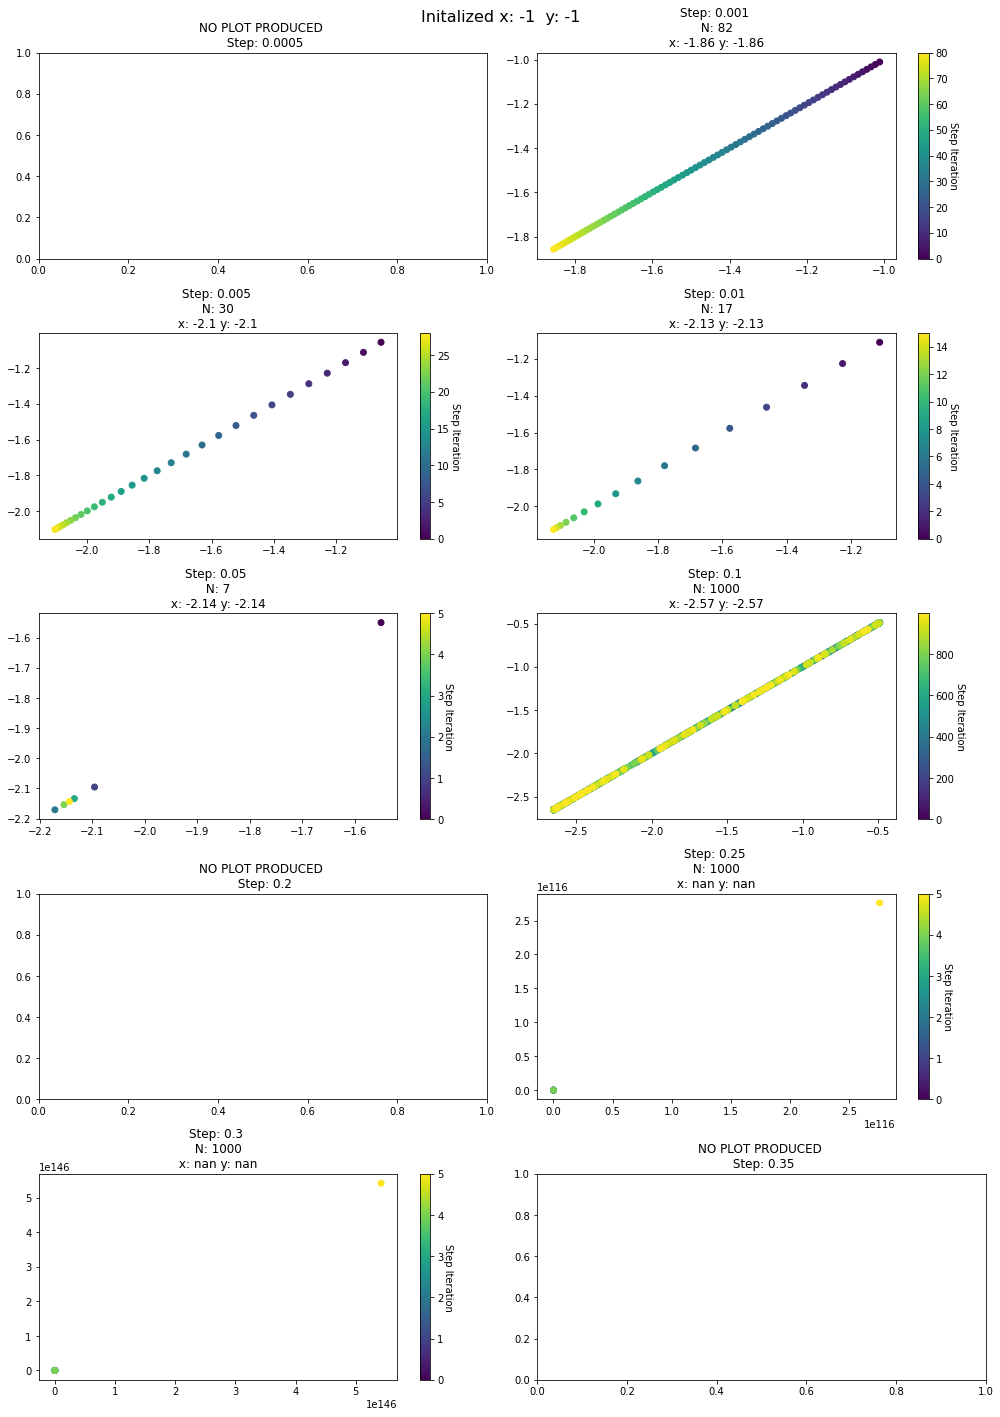

In [138]:
x0 = -1
y0 = -1

execute_steep_desc_plot(N, d, x0,y0,STEPS)

(d) Repeat with (0, 0) as the initial point.


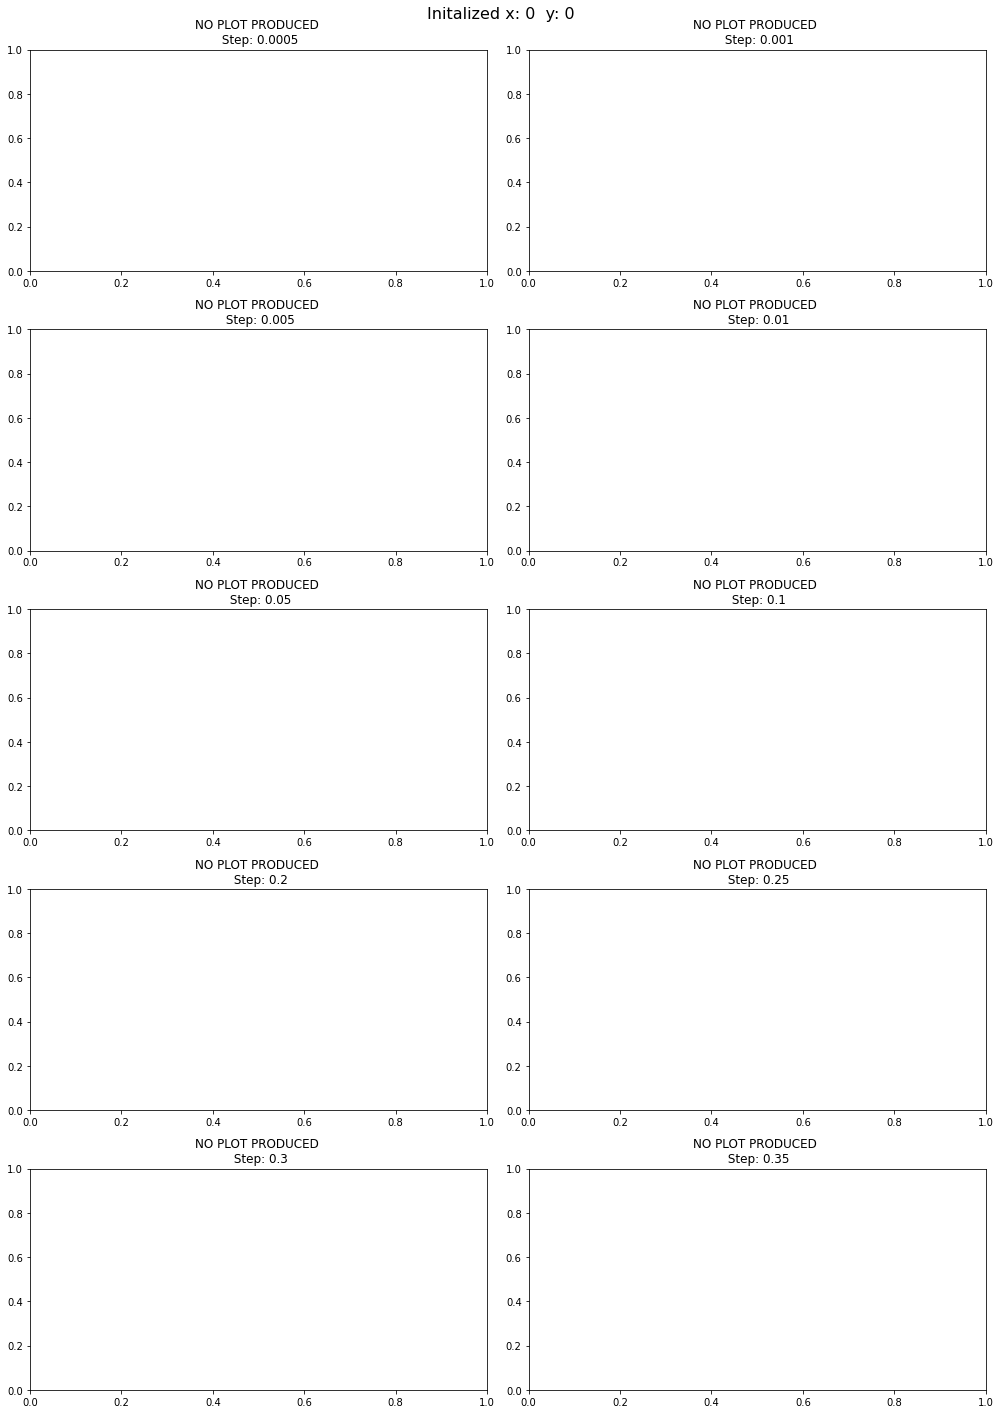

In [139]:
x0 = 0
y0 = 0

execute_steep_desc_plot(N, d, x0,y0,STEPS)

(e) Plot z = f (x,y) in the domain [-3.2, 2.2] times [-3.2, 2.2], with x and y increments of 0.1.

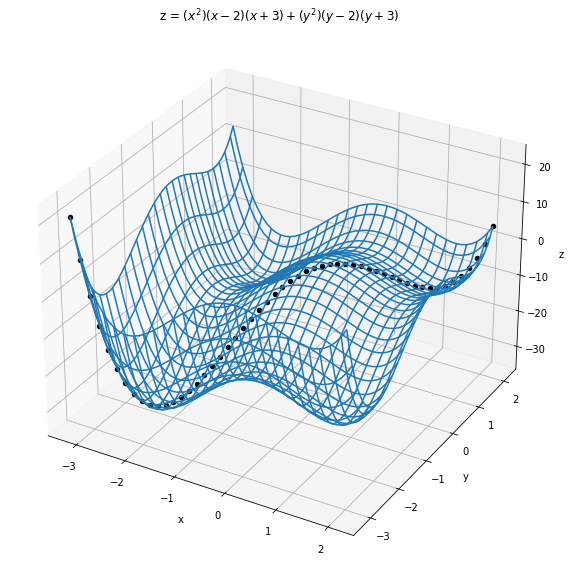

In [130]:
fig = plt.figure(figsize=(10,10))
x = np.arange(-3.2,2.2, 0.1)
y = np.arange(-3.2,2.2, 0.1)

def f(x, y):
    return (x**2)*(x-2)*(x+3) + (y**2)*(y-2)*(y+3)
z = f(x,y)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = fig.add_subplot(111, projection='3d')
Path3 = ax.plot_wireframe(X,Y,Z)
ax.scatter(x, y, z, zdir='z', s=20, c='black', depthshade=False) 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
text=ax.set_title(r"z = $(x^2)(x-2)(x+3) + (y^2)(y-2)(y+3)$")